In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
d=1
g=0.1
w=0.1
gamma = 0.1
Omega = 0
wd=0

tmax = 20/d
tint = tmax/100
nsteps = np.int( tmax / tint - 1 )
times = np.linspace(0,tmax,nsteps)
nsteps = len(times)

nb_cav_dim = 5
spinx_arr_qt = np.zeros( (nb_cav_dim, nsteps) )
n_arr_qt = np.zeros( (nb_cav_dim, nsteps) )

for i in range(nb_cav_dim):
    
    cavity_dim = 10*(i+1)

    phi0_qb = ( qt.basis(2,0)+qt.basis(2,1) ).unit()
    rho0_qb = phi0_qb * phi0_qb.dag()
    rho0 = qt.tensor( rho0_qb, qt.fock_dm(cavity_dim, 0) )
    a = qt.tensor( qt.qeye(2), qt.destroy(cavity_dim) )
    b = qt.tensor( qt.destroy(2), qt.qeye(cavity_dim) )
    
    c_ops = [np.sqrt(gamma) * a]

    H = (d-wd)*b*b.dag() - 0.5*g*(b+b.dag())*(a+a.dag()) + (w-wd)*a*a.dag() +0.5*Omega*(a+a.dag())

    t1= time.time()
    sol = qt.mesolve( H, rho0, times, c_ops, [b+b.dag(),a.dag()*a] )
    t2= time.time()
    print("time=",t2-t1)
    
    spinx_arr_qt[i,:] = sol.expect[0]
    n_arr_qt[i,:] = sol.expect[1]



time= 0.011549949645996094
time= 0.019788026809692383
time= 0.037915945053100586
time= 0.05669713020324707
time= 0.0836033821105957


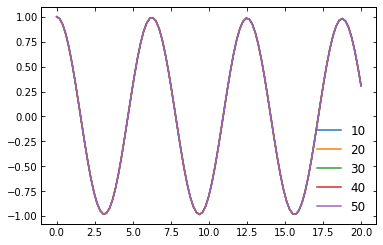

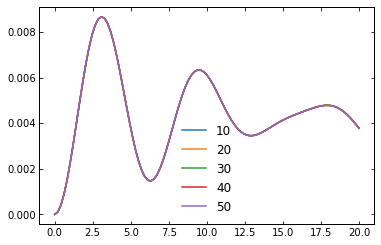

In [6]:
for i in range(nb_cav_dim):
    label_val=10*(i+1)
    plt.plot( np.array(times)*d, spinx_arr_qt[i,:], label=label_val)
plt.legend()
plt.show()

for i in range(nb_cav_dim):
    label_val=10*(i+1)
    plt.plot( np.array(times)*d, n_arr_qt[i,:], label=label_val)
plt.legend()

In [124]:
qt.expect(rho0, a.dag()*a)

0.0